In [1]:
from func_modules import ControllerGraph
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Functionality 5: explaining and visualizing

For this functionality is required to find the communities that are in the first graph, `hero_graph`.
In a network we can find nodes that can be easily grouped into (potentially overlapping) sets, such that each set of nodes is densely connected internally: this type of group is called **community**. There are several algorithms used to find network communities, we'll use the [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan–Newman_algorithm) algorithm: this algorithm detects communities by progressively removing from the network edges with the higher edge betweenness centrality, i.e. the ones contained in more shortest paths.

In [2]:
edges = pd.read_csv('./data/edges.csv')
controller = ControllerGraph(edges)
with open('graphs.pickle', 'rb') as file:
    hero_graph, hero_comics_graph = pickle.load(file)

In [3]:
from func_modules.functionalities_5 import faitabella, colorgraph, identifygroup

numedges, graph1, checkhero, graph= controller.functionality(5,
        hero_graph, num_heroes = 50, hero_1 = 'CAPTAIN AMERICA', hero_2 = 'IRON MAN/TONY STARK')

comps = list(nx.connected_components(graph1)) # lists of different connected component

In [4]:
print('This is the number of removed edges: ', numedges)

This is the number of removed edges:  1022


As we can see in the table the second community is composed only by one node: it's due to the extremely high density of the graph when considering the top 50 heroes. Please notice that this algorithm requires computing betweeness centrality, which is an extremely expensive metric. Therefore, we are very constrained in the amount of nodes we can have in the graph if we want to limit the execution time to something bearable.

In [5]:
faitabella(graph1,comps)       # communities' table 

Group 0                  Group 1
-----------------------  -------------------
BLACK WIDOW/NATASHA      IRON MAN/TONY STARK
ICEMAN/ROBERT BOBBY
BEAST/HENRY &HANK& P
CANNONBALL II/SAM GU
WONDER MAN/SIMON WIL
SHE-HULK/JENNIFER WA
PROFESSOR X/CHARLES
HERCULES [GREEK GOD]
NIGHTCRAWLER/KURT WA
DAREDEVIL/MATT MURDO
SUB-MARINER/NAMOR MA
HAWK
INVISIBLE WOMAN/SUE
JARVIS, EDWIN
PUNISHER II/FRANK CA
MARVEL GIRL/JEAN GRE
SILVER SURFER/NORRIN
DR. DOOM/VICTOR VON
HULK/DR. ROBERT BRUC
RICHARDS, FRANKLIN B
SCARLET WITCH/WANDA
ANT-MAN/DR. HENRY J.
CAPTAIN BRITAIN/BRIA
CAPTAIN AMERICA
NELSON, FRANKLIN FOG
PARKER, MAY
SPIDER-MAN/PETER PARKER
MR. FANTASTIC/REED R
WOLVERINE/LOGAN
VISION
ANGEL/WARREN KENNETH
COLOSSUS II/PETER RA
BLACK PANTHER/T'CHAL
ODIN [ASGARDIAN]
WATSON-PARKER, MARY
SHADOWCAT/KATHERINE
FURY, COL. NICHOLAS
HUMAN TORCH/JOHNNY S
DR. STRANGE/STEPHEN
JAMESON, J. JONAH
THOR/DR. DONALD BLAK
QUICKSILVER/PIETRO M
STORM/ORORO MUNROE S
CYCLOPS/SCOTT SUMMER
JONES, RICHARD MILHO
ROBERTSON, JOE
THING/B

The nodes are very connected and the graph density is very high (again, also due to the fact that we are considering the top 50 heroes).

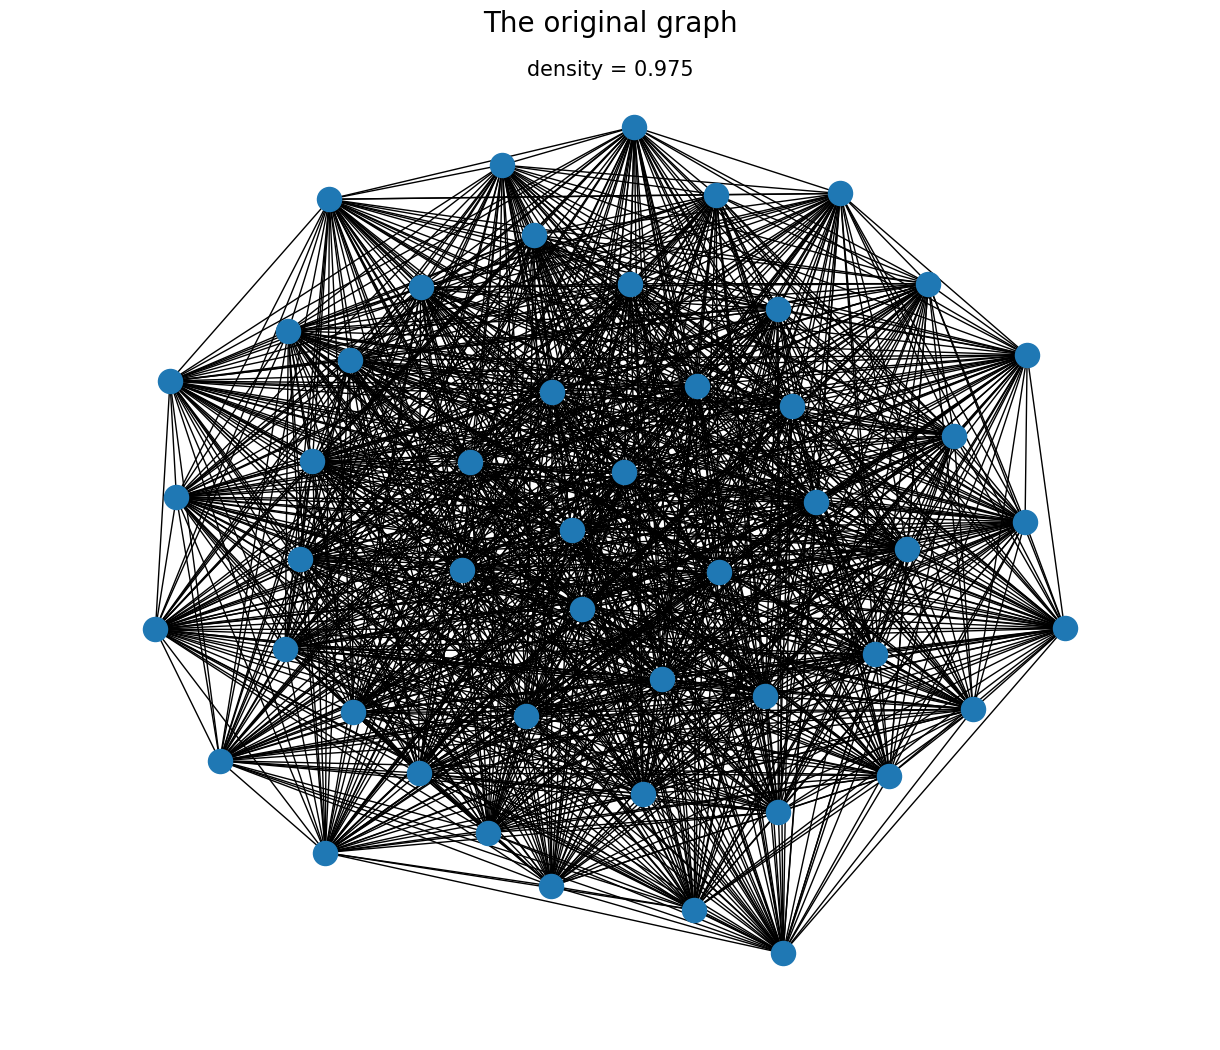

In [6]:
plt.gcf().set_size_inches((12, 10))
nx.draw(graph, with_labels=False)          # plot original graph
plt.margins(x=0.10)
plt.suptitle(f'density = {round(nx.density(graph), 3)}', size = 15)
plt.title('The original graph', size = 20)
plt.show()

As per the output of our functionality, we have two communities: one extremely dense and the other with only one node

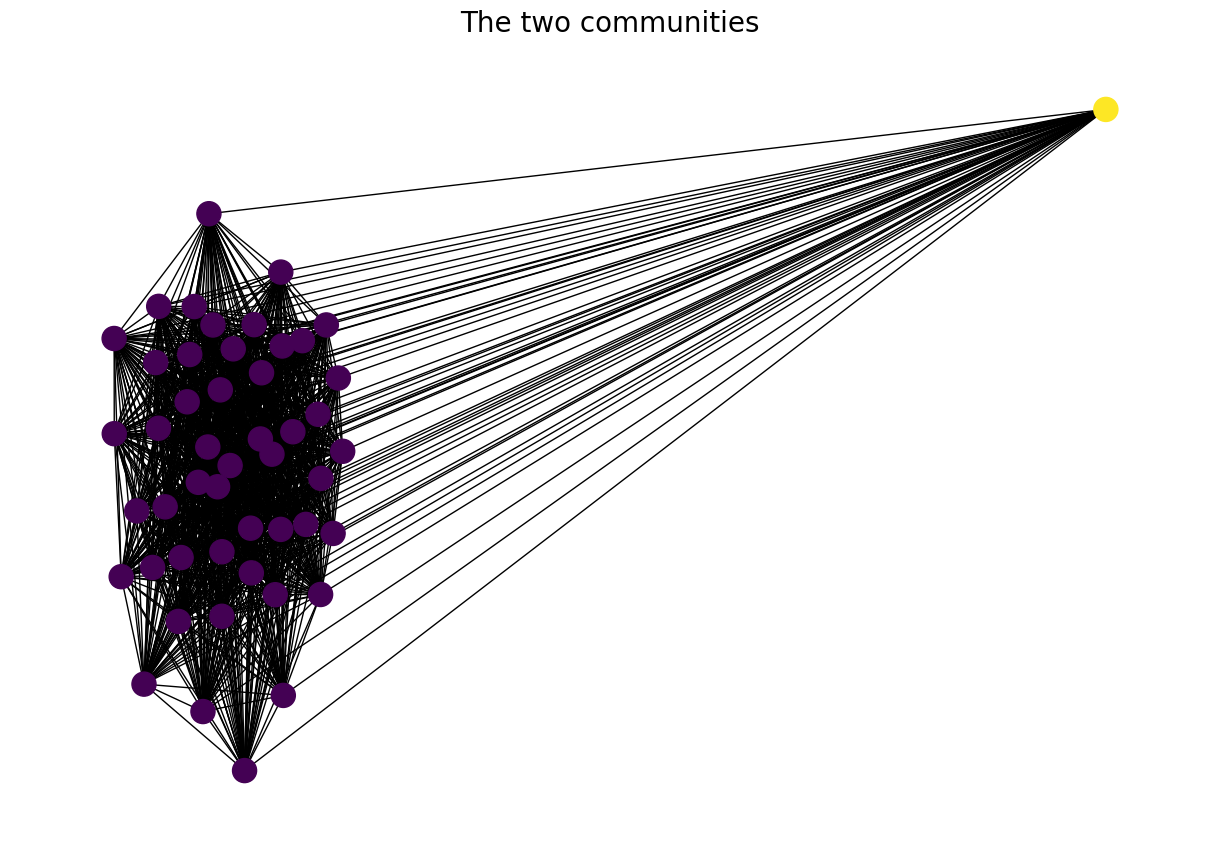

In [7]:
plt.gcf().set_size_inches((12, 8))
color_map, pos = colorgraph(graph1, comps)  # function which defines nodes' color and position by belonging community
nx.draw(graph, pos, node_color = list(color_map.values()), with_labels = False)
plt.title('The two communities', size = 20)
plt.show()

As we can see _CAPTAIN AMERICA_ and _IRON MAN/TONY STARK_ are in two different communities.

Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'


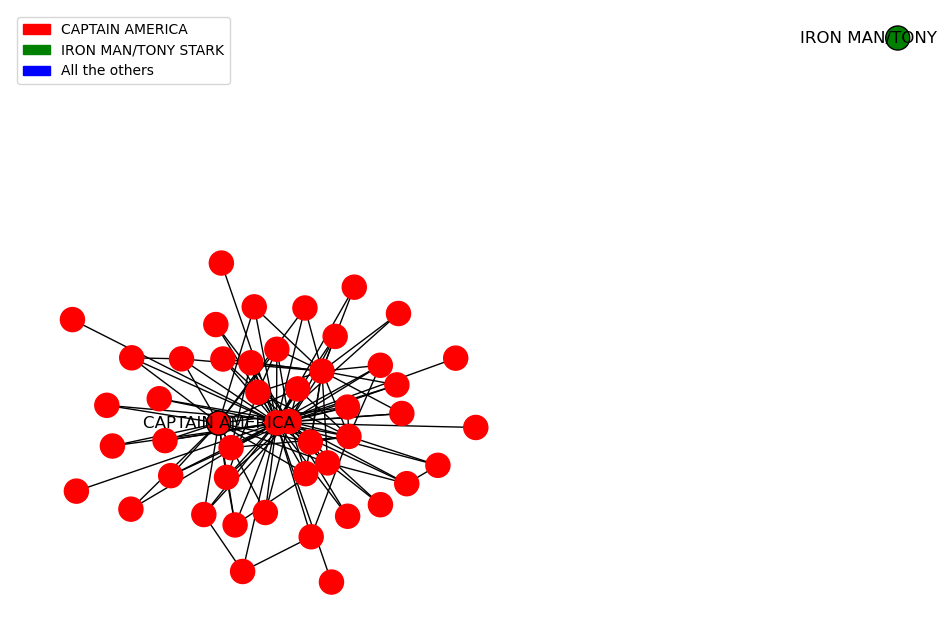

In [8]:
plt.gcf().set_size_inches((12, 8))
print("Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'")
idhero = identifygroup(graph1,'CAPTAIN AMERICA','IRON MAN/TONY STARK', color_map)  # given heros' communities